In [1]:
import numpy as np
import matplotlib.pyplot as plt
import finufft

# FINUFFT

In [9]:
Nx, Ny = 100, 100
Mx, My = Nx, Nx
Lfx, Lfy = Nx, Nx

In [10]:
xvec = np.linspace(-1, 1, Nx) * 3
yvec = np.linspace(-1, 1, Ny) * 3
xx, yy = np.meshgrid(xvec, yvec, indexing='xy')
x = xx.flatten()
y = yy.flatten()
xmax, ymax = abs(xvec).max(), abs(yvec).max()

In [11]:
pitchx = xvec[-1] - xvec[-2]
pitchy = yvec[-1] - yvec[-2]
fftmaxX = 1 / 2 / pitchx
fftmaxY = 1 / 2 / pitchy
dfx = fftmaxX * 2 / Lfx
dfy = fftmaxY * 2 / Lfy

fxvec = np.linspace(-fftmaxX, fftmaxX - dfx, Lfx)
fyvec = np.linspace(-fftmaxY, fftmaxY - dfy, Lfy)
fxx, fyy = np.meshgrid(fxvec, fyvec, indexing='xy')
fx, fy = fxx.flatten(), fyy.flatten()

In [12]:
svec = np.linspace(-1, 1, Mx) * 3
tvec = np.linspace(-1, 1, My) * 3
ss, tt = np.meshgrid(svec, tvec, indexing='xy')
s = ss.flatten()
t = tt.flatten()
smax, tmax = abs(svec).max(), abs(tvec).max()

/home/hywei/anaconda3/envs/sampling/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.complex` is a deprecated alias for the builtin `complex`. To silence this warning, use `complex` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.complex128` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


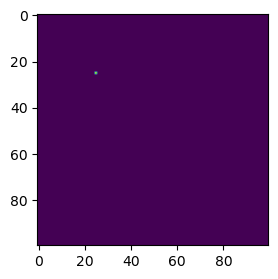

In [13]:
E0 = np.zeros((Nx, Ny))
E0[Nx//4, Ny//4] = 1
plt.figure(figsize=(3,3))
plt.imshow(E0)
E0 = E0.flatten().astype(np.complex)

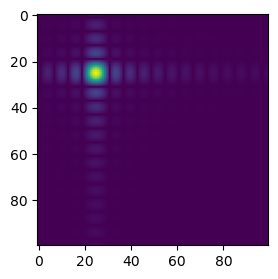

In [14]:
iflag = -1
eps = 1e-12
Fu = finufft.nufft2d3(x / xmax * np.pi, y / ymax * np.pi, E0, fx, fy, isign=iflag, eps=eps)
Eout = finufft.nufft2d3(fx / Nx * np.pi , fy / Ny * np.pi, Fu, 
                        s / xmax * Mx, t / ymax * My, 
                        isign=-iflag, eps=eps).reshape(My, Mx)
plt.figure(figsize=(3,3))
plt.imshow(abs(Eout))

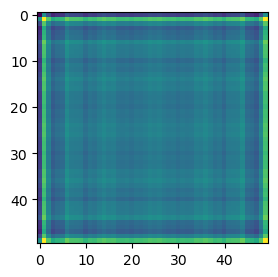

In [8]:
plt.figure(figsize=(3,3))
plt.imshow(abs(Fu.reshape(Lfy, Lfx)))